# Building of the 3 Machine Learning Models in a multi-regressor way

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
df = pd.read_csv("data.csv")
df = df.sample(frac=0.1)
df.shape

(50676, 55)

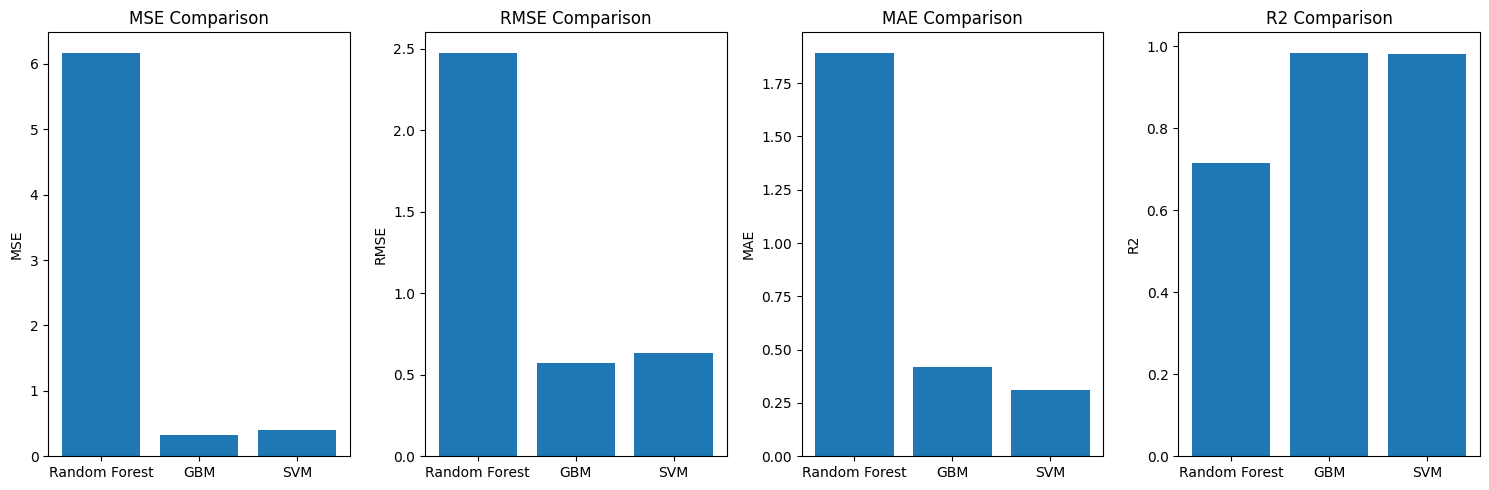

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.multioutput import MultiOutputRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Split the data into features and objective variables
X = df.iloc[:, :50]
y = df.iloc[:, -5:]

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize models with MultiOutputRegressor for GBM and SVM
models = {
    'Random Forest': RandomForestRegressor(random_state=42),
    'GBM': MultiOutputRegressor(GradientBoostingRegressor(random_state=42)),
    'SVM': MultiOutputRegressor(SVR())
}

# Metrics to be evaluated
def rmse(y_true, y_pred):
    mse_values = mean_squared_error(y_true, y_pred, multioutput='raw_values')
    rmse_values = np.sqrt(mse_values)
    return rmse_values.mean()

metrics = {
    'MSE': mean_squared_error,
    'RMSE': rmse,
    'MAE': mean_absolute_error,
    'R2': r2_score
}

# Evaluate models and store results
results = {metric: {model: 0 for model in models} for metric in metrics}

for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    for metric_name, metric_func in metrics.items():
        if metric_name == 'R2':
            score = metric_func(y_test, y_pred, multioutput='variance_weighted')
        elif metric_name in ['MSE', 'MAE']:
            score = metric_func(y_test, y_pred, multioutput='raw_values').mean()
        else:
            score = metric_func(y_test, y_pred)  # For RMSE
        results[metric_name][model_name] = score

# Plotting results
num_metrics = len(metrics)
fig, axes = plt.subplots(1, num_metrics, figsize=(15, 5))

for i, (metric_name, model_scores) in enumerate(results.items()):
    ax = axes[i]
    ax.bar(model_scores.keys(), model_scores.values())
    ax.set_ylabel(metric_name)
    ax.set_title(f'{metric_name} Comparison')

plt.tight_layout()
plt.show()
